In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch dataset 
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
#print(mushroom.metadata) 
  
# variable information 
#print(mushroom.variables) 

df=mushroom.data.original
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [9]:
label_encoders = {}

for column in df.columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder

# Display the conversion table
for column, encoder in label_encoders.items():
    print(f"Conversion table for '{column}':")
    for original_value, encoded_value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"{original_value}: {encoded_value}")
    print()

Conversion table for 'cap-shape':
b: 0
c: 1
f: 2
k: 3
s: 4
x: 5

Conversion table for 'cap-surface':
f: 0
g: 1
s: 2
y: 3

Conversion table for 'cap-color':
b: 0
c: 1
e: 2
g: 3
n: 4
p: 5
r: 6
u: 7
w: 8
y: 9

Conversion table for 'bruises':
f: 0
t: 1

Conversion table for 'odor':
a: 0
c: 1
f: 2
l: 3
m: 4
n: 5
p: 6
s: 7
y: 8

Conversion table for 'gill-attachment':
a: 0
f: 1

Conversion table for 'gill-spacing':
c: 0
w: 1

Conversion table for 'gill-size':
b: 0
n: 1

Conversion table for 'gill-color':
b: 0
e: 1
g: 2
h: 3
k: 4
n: 5
o: 6
p: 7
r: 8
u: 9
w: 10
y: 11

Conversion table for 'stalk-shape':
e: 0
t: 1

Conversion table for 'stalk-root':
b: 0
c: 1
e: 2
r: 3
nan: 4

Conversion table for 'stalk-surface-above-ring':
f: 0
k: 1
s: 2
y: 3

Conversion table for 'stalk-surface-below-ring':
f: 0
k: 1
s: 2
y: 3

Conversion table for 'stalk-color-above-ring':
b: 0
c: 1
e: 2
g: 3
n: 4
o: 5
p: 6
w: 7
y: 8

Conversion table for 'stalk-color-below-ring':
b: 0
c: 1
e: 2
g: 3
n: 4
o: 5
p: 6
w: 7
y: 

In [10]:
print(mushroom.variables) 
#print(df)

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
temp = df.drop('poisonous', axis=1, inplace=False)


Accuracy Score:
0.9901538461538462
AUC Score:
0.9899548864880936
Confusion Matrix:
[[839   4]
 [ 12 770]]


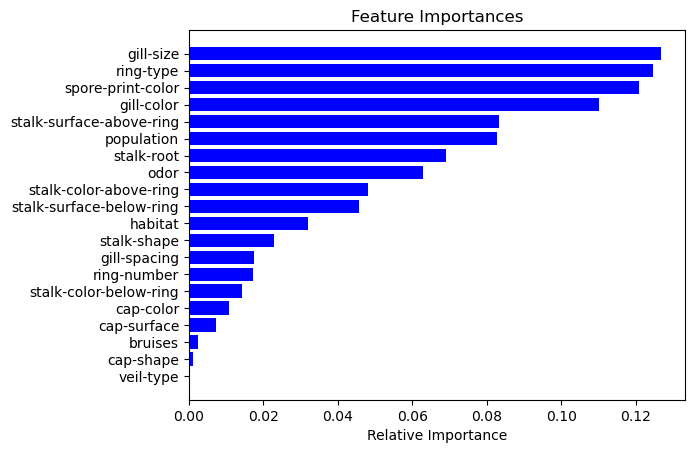

In [41]:
X = df[df.drop('poisonous', axis=1, inplace=False).columns]
y = df['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model


rf_model = RandomForestClassifier(
    random_state=1,
    max_depth=5,  # Adjust the maximum depth
    min_samples_split=2,  # Adjust the minimum samples required to split
    min_samples_leaf=1,  # Adjust the minimum samples required for a leaf
    max_features='sqrt',  # Use the square root of the number of features
    n_estimators=10  # Adjust the number of trees
)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

#fit model
rf_model.fit(X_train, y_train)

# make predictions 
y_pred = rf_model.predict(X_test)
y_pred

features = X.columns
importances = rf_model.feature_importances_


#print scores
print("")
print("Accuracy Score:")
print(metrics.accuracy_score(y_test, y_pred))
print("AUC Score:")
print(metrics.roc_auc_score(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['gill-size','ring-type']]
y = df['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

#fit model
model.fit(X_train, y_train)

# make predictions 
y_pred = model.predict(X_test)
y_pred

features = X.columns
print(features)
importances = model.feature_importances_
print(importances)

#print scores
print("")
print("Accuracy Score:")
print(metrics.accuracy_score(y_test, y_pred))
print("AUC Score:")
print(metrics.roc_auc_score(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Index(['gill-size', 'ring-type'], dtype='object')
[0.38860617 0.61139383]

Accuracy Score:
0.9150769230769231
AUC Score:
0.9147257541419787
Confusion Matrix:
[[779  64]
 [ 74 708]]


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df=df.dropna()

X = df[['gill-size','gill-color','population','stalk-root','ring-type']]
y = df['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=15, min_samples_split=2)


#fit model
model.fit(X_train, y_train)

# make predictions 
y_pred = model.predict(X_test)
y_pred

features = X.columns
print(features)
importances = model.feature_importances_
print(importances)

#print scores
print("")
print("Accuracy Score:")
print(metrics.accuracy_score(y_test, y_pred))
print("AUC Score:")
print(metrics.roc_auc_score(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Index(['gill-size', 'gill-color', 'population', 'stalk-root', 'ring-type'], dtype='object')
[0.17620589 0.25920223 0.16577489 0.1503542  0.24846279]

Accuracy Score:
0.9766153846153847
AUC Score:
0.9761197222196939
Confusion Matrix:
[[834   9]
 [ 29 753]]


In [50]:
new_mushroom = pd.DataFrame({'gill-size': ['1'],
                              'spore-print-color': ['3']})
#broad gill size (b:1) and brown spore print color n:3
# Use the trained model to make predictions for the new instance
prediction = model.predict(new_mushroom)

# Print the prediction
print("Predicted class for the new mushroom:", prediction)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- spore-print-color
Feature names seen at fit time, yet now missing:
- gill-color
- population
- ring-type
- stalk-root


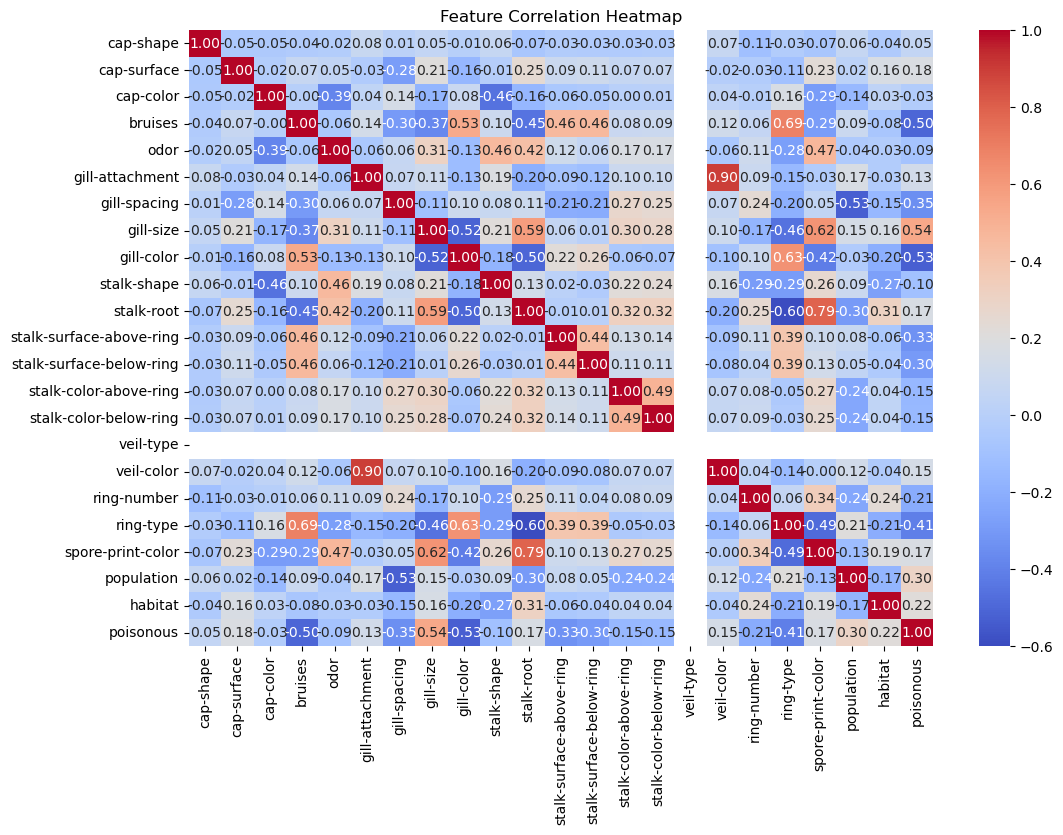

In [29]:
import seaborn as sns
correlation_matrix = df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig('correlationmap.png')
plt.show()


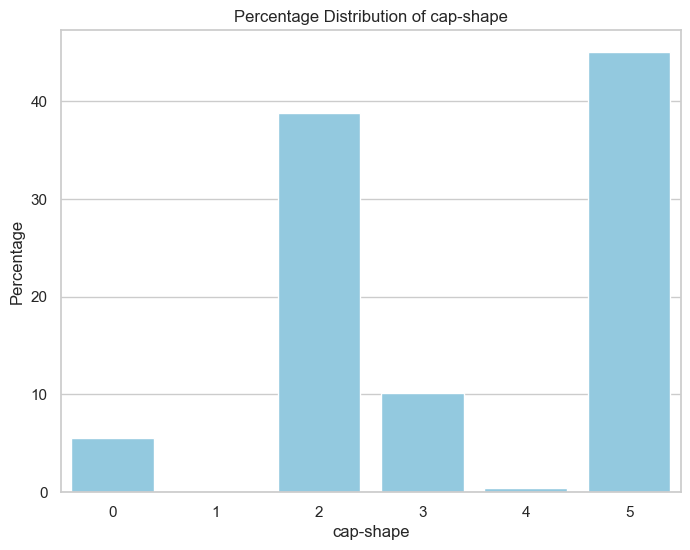

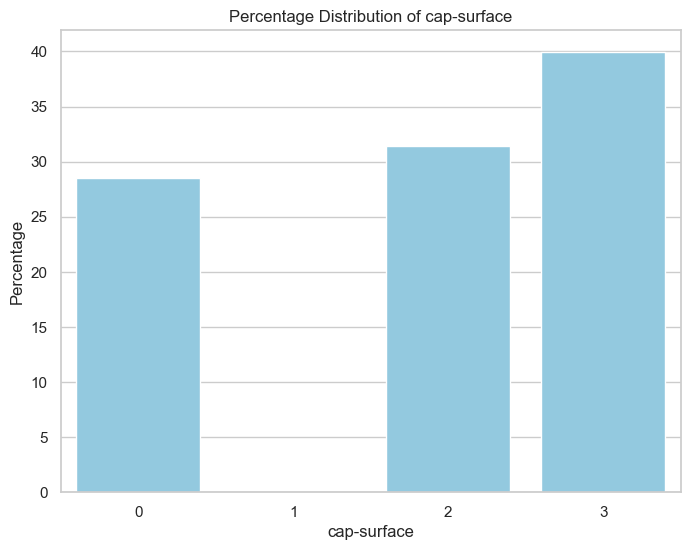

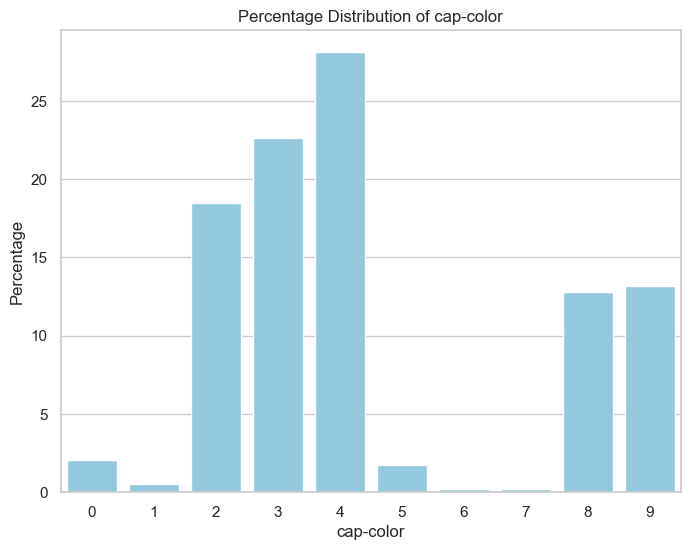

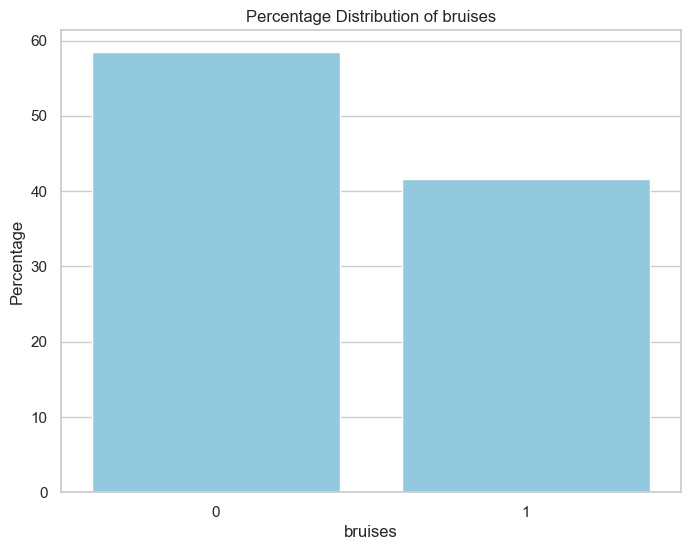

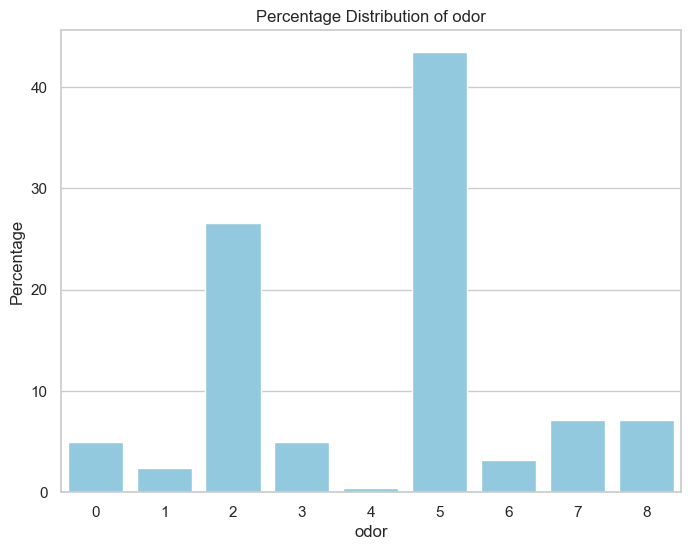

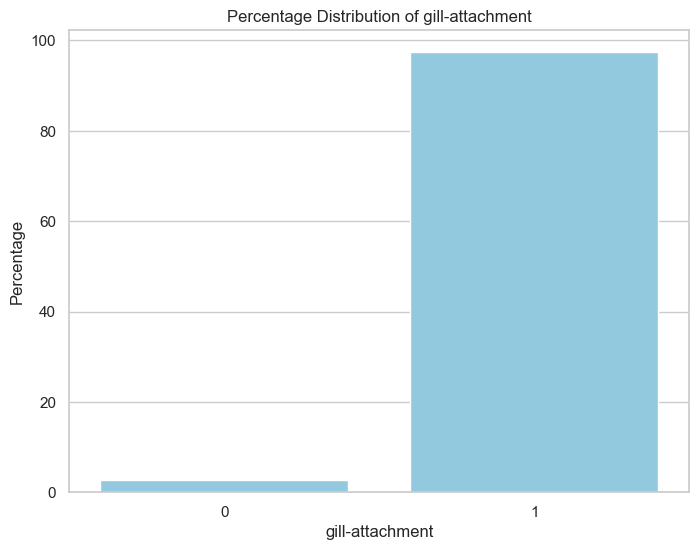

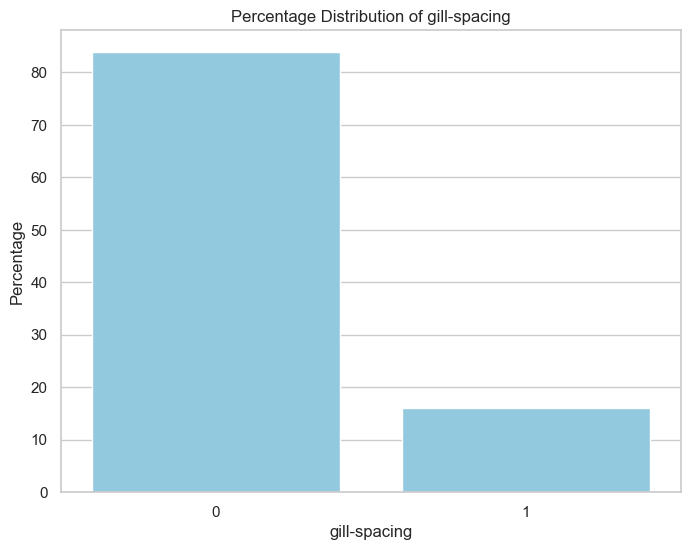

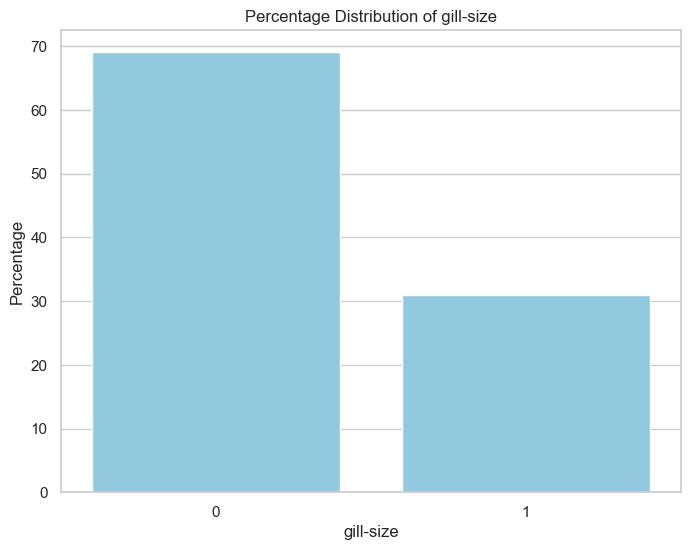

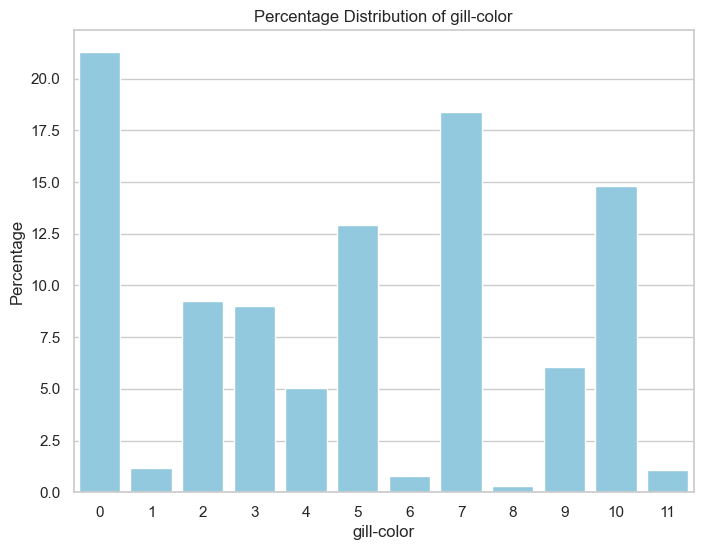

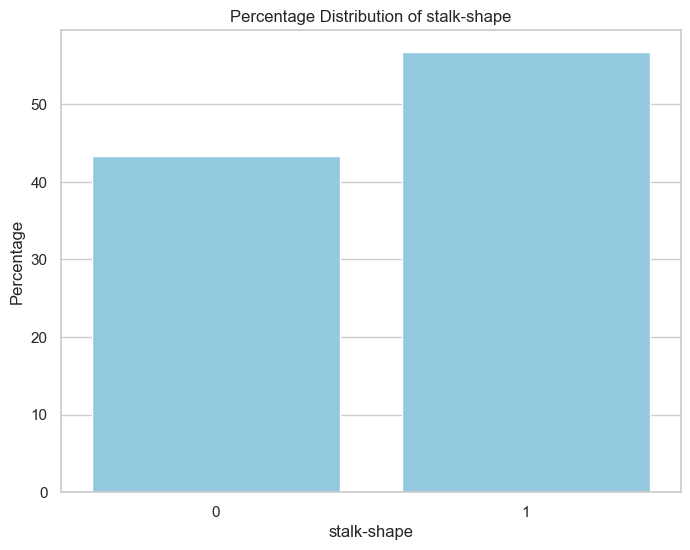

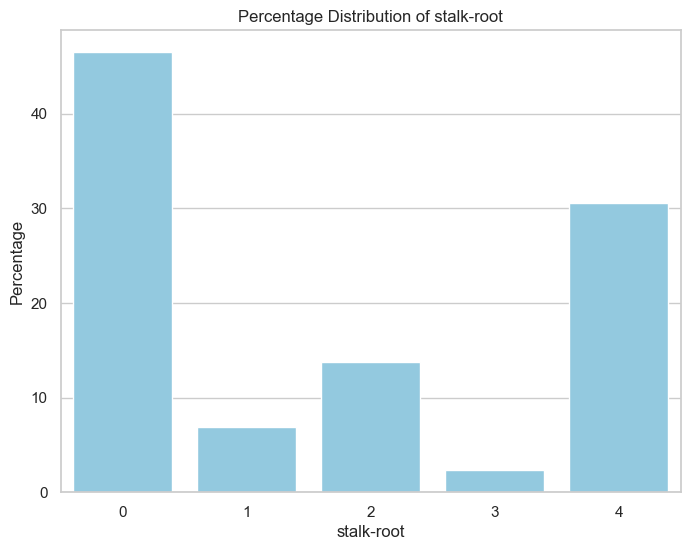

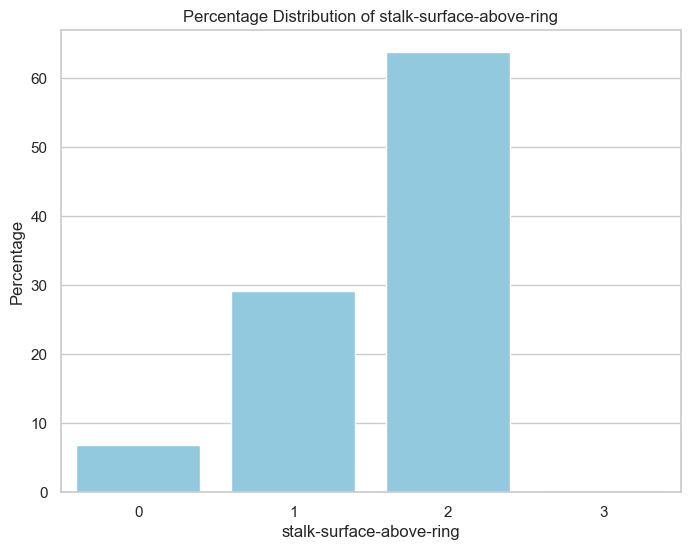

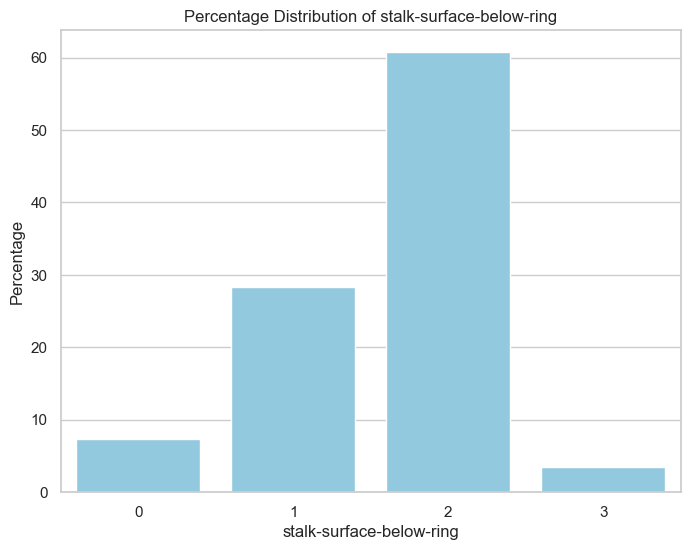

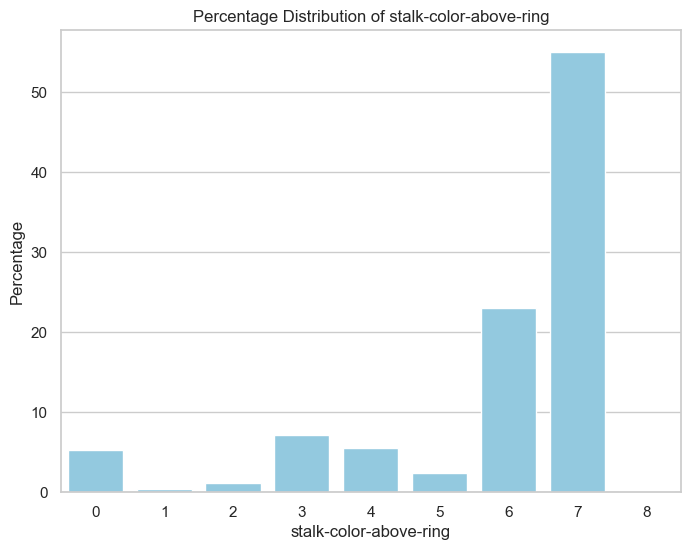

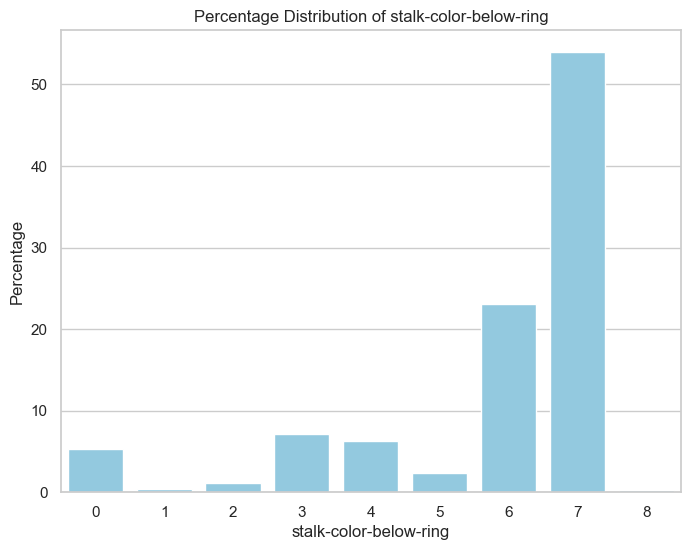

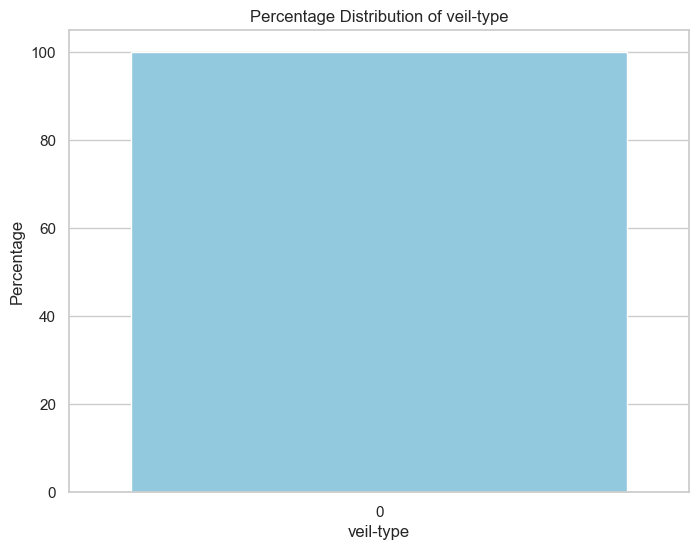

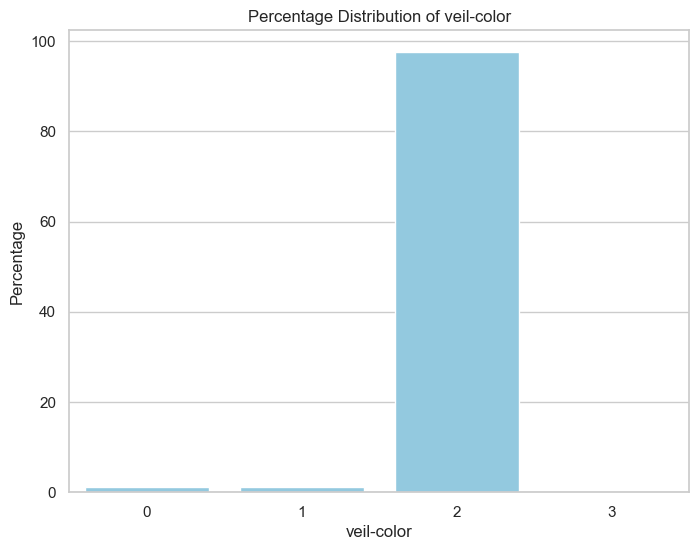

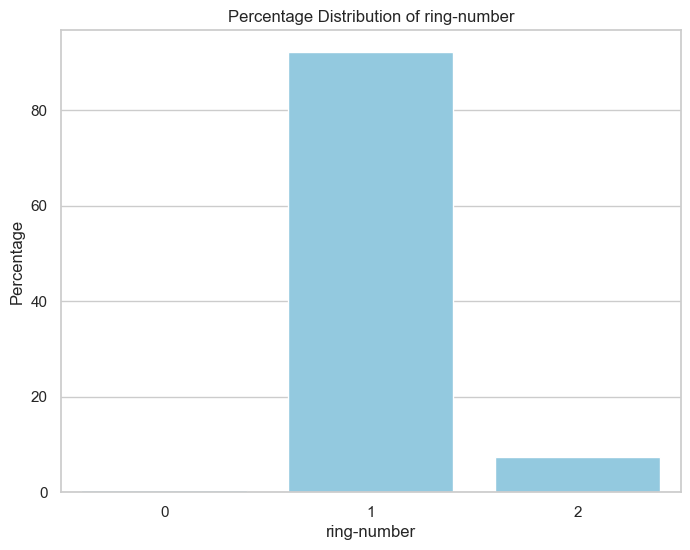

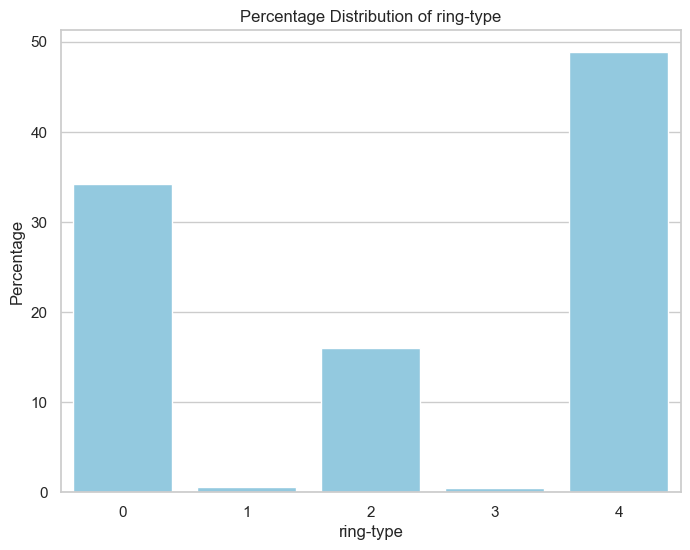

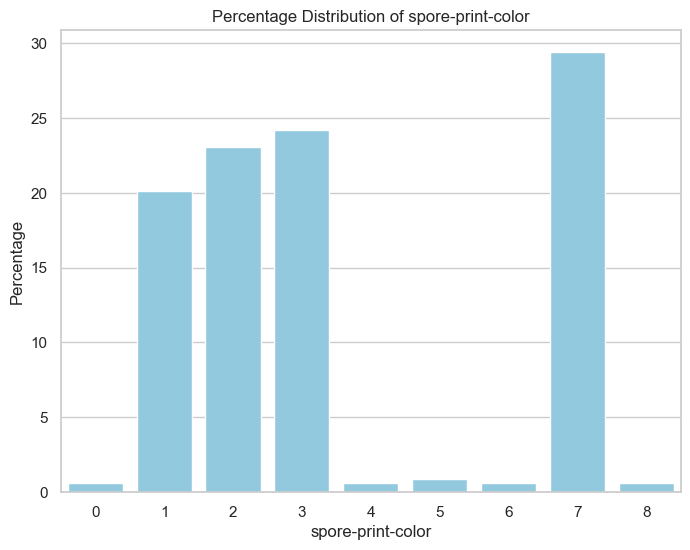

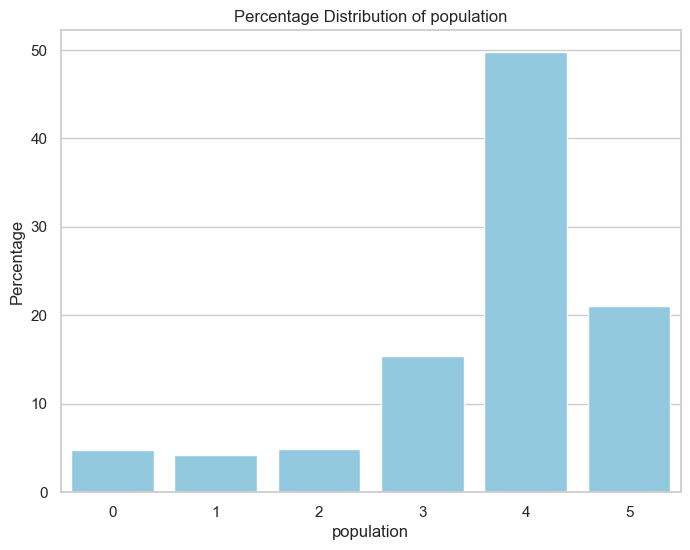

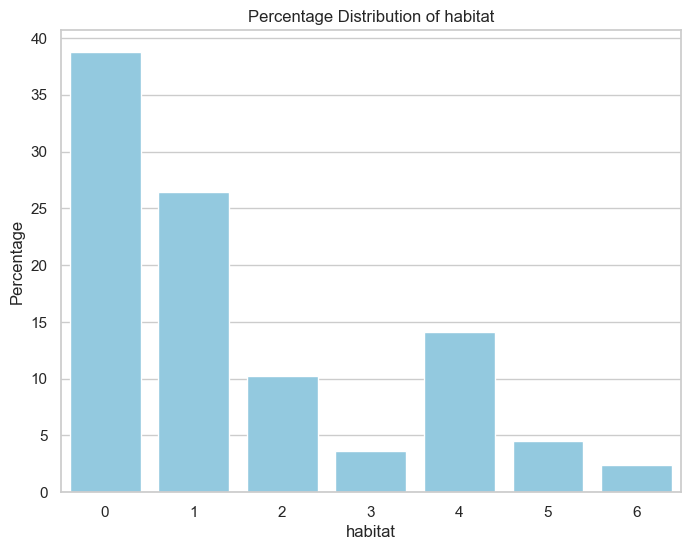

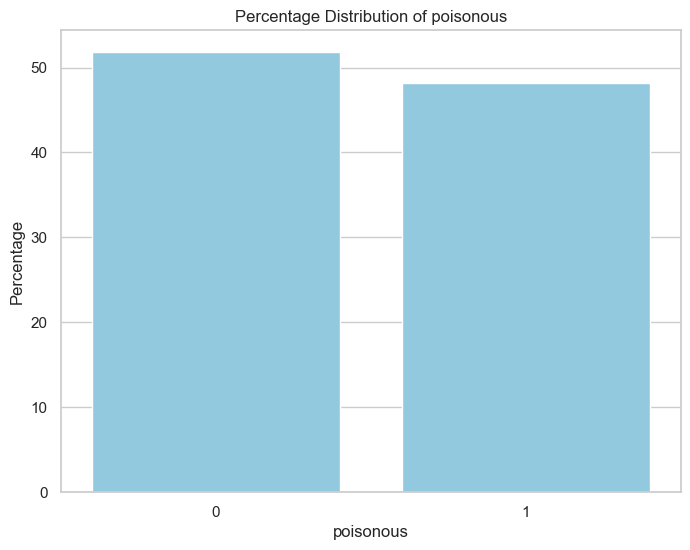

In [51]:
def plot_percentage_distribution(column):
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    
    # Calculate percentage distribution
    percentages = df[column].value_counts(normalize=True) * 100
    
    # Plot the distribution
    sns.barplot(x=percentages.index, y=percentages.values, color='skyblue')
    
    plt.title(f'Percentage Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.show()

# Iterate through each column in the DataFrame and plot its percentage distribution
for column in df.columns:
    plot_percentage_distribution(column)
